# 🏠 Regresi Linear — Prediksi Harga Rumah (Ames Housing)

Pada bagian ini, kita melakukan serangkaian eksperimen regresi untuk **memprediksi harga rumah (SalePrice)** berdasarkan beberapa fitur seperti luas bangunan, kualitas rumah, dan fitur lainnya pada dataset **Ames Housing**.

Tujuan utamanya adalah memahami bagaimana berbagai pendekatan regresi bekerja — mulai dari **regresi linear biasa**, **gradasi polinomial**, **metode robust seperti RANSAC**, hingga **model berbasis pohon keputusan dan random forest**.

---

## 📘 Alur Eksperimen Lengkap

### **1) Persiapan Dataset**
- Mengambil subset kolom:  
  `Overall Qual`, `Overall Cond`, `Gr Liv Area`, `Central Air`, `Total Bsmt SF`, `SalePrice`
- Encode variabel kategorikal  
  → `Central Air: Y → 1, N → 0`
- Membersihkan *missing values*
- Visualisasi awal:
  - Scatterplot matrix  
  - Heatmap korelasi

---

### **2) Regresi Linear Menggunakan Gradient Descent**
- Implementasi manual kelas **LinearRegressionGD**
- Menstandarkan fitur & target menggunakan **StandardScaler**
- Melatih model dengan *gradient descent*
- Plot **learning curve (MSE vs epoch)**
- Visualisasi garis regresi pada data yang telah distandarkan
- Prediksi rumah berukuran **2500 sqft**
- Menampilkan **slope & intercept**

---

### **3) Regresi Linear Menggunakan Scikit-Learn**
- Menggunakan `LinearRegression()` bawaan sklearn
- Membandingkan slope & intercept dengan model GD
- Visualisasi garis regresi dalam skala dolar asli

---

### **4) Regresi Normal Equation**
Menghitung bobot regresi menggunakan formula:

\[
(X^TX)^{-1}X^Ty
\]

---

### **5) Robust Regression — RANSAC**
Menggunakan `RANSACRegressor()` untuk:

- Memisahkan **inliers** dan **outliers**
- Melatih model yang lebih stabil terhadap data ekstrem
- Visualisasi garis regresi RANSAC serta titik penyimpang

---

### **6) Evaluasi Model Regresi**
- Train–test split  
- Mengukur:
  - **MSE**
  - **MAE**
  - **R² Score**
- Plot residuals untuk data train & test

---

### **7) Regularisasi: Ridge, Lasso, ElasticNet**
- Mengurangi overfitting dengan penalti L1 dan L2
- Menampilkan bobot koefisien & performa model

---

### **8) Polynomial Regression**
Membandingkan model:
- Linear (d = 1)
- Quadratic (d = 2)
- Cubic (d = 3)

Visualisasi kurva polinomial dan perhitungan MSE & R².

---

### **9) Pohon Keputusan & Random Forest**
- `DecisionTreeRegressor (max_depth=3)`  
  → Model non-linear berbasis aturan
- `RandomForestRegressor (1000 trees)`  
  → Ensemble pohon dengan akurasi lebih baik

Evaluasi:
- MAE (train & test)
- R² (train & test)
- Plot residuals random forest

---

## 🧠 Tujuan Pembelajaran
Notebook ini membantu memahami:

- Proses lengkap membangun model regresi
- Perbedaan metode:
  - Linear, polinomial, robust, regularisasi
  - Tree-based dan ensemble
- Evaluasi performa (MSE, MAE, R²)
- Interpretasi visual hasil model

---

## ⚙️ Model yang Digunakan
| Model | Tipe | Kekuatan |
|-------|--------|-------------|
| **Linear Regression (GD & sklearn)** | Linear | Dasar, mudah diinterpretasi |
| **Normal Equation** | Linear | Perhitungan analitik cepat |
| **RANSAC** | Robust | Tahan outlier |
| **Ridge / Lasso / ElasticNet** | Regularisasi | Cegah overfitting |
| **Polynomial Regression** | Non-linear | Menangkap pola melengkung |
| **Decision Tree** | Non-linear | Aturan if–else |
| **Random Forest** | Ensemble | Stabil & akurat |

---

## 🎯 Tujuan Akhir
Notebook ini menyediakan alur komprehensif untuk:

- Membangun regresi dari dasar hingga teknik lanjut  
- Memahami stabilitas & generalisasi model  
- Menghasilkan prediksi harga rumah yang **lebih akurat dan robust**

---


# 🏡 Persiapan Data — Ames Housing Dataset

Melakukan preprocessing awal untuk menyiapkan data sebelum analisis regresi.

### 🔍 Langkah Utama:
- **Memilih kolom penting** terkait kualitas, kondisi, luas bangunan, AC sentral, dan harga rumah.  
- **Memuat dataset** dari URL (format tab-separated).  
- **Mengubah fitur kategorikal** `Central Air` menjadi numerik (N=0, Y=1).  
- **Membersihkan data** dengan mengecek dan menghapus baris yang memiliki missing values.

Dataset kini bersih dan siap digunakan untuk analisis regresi berikutnya.


In [14]:
import pandas as pd       # Silakan diisi bagian ini dengan kode yang tepat
import numpy as np       # Silakan diisi bagian ini dengan kode yang tepat

# Kolom yang dipilih dari dataset Ames Housing
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

# Membaca dataset langsung dari URL
df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', # Silakan diisi bagian ini dengan kode yang tepat
                 sep='\t',          # pemisah tab
                 usecols=columns)

df.head()          # Silakan diisi bagian ini dengan kode yang tepat

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [15]:
# Melihat jumlah baris dan kolom dataset
df.shape                               # Silakan diisi bagian ini dengan kode yang tepat

(2930, 6)

In [16]:
# Mengubah fitur kategorikal 'Central Air' menjadi numerik (encoding biner)
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})           # Silakan diisi bagian ini dengan kode yang tepat

In [17]:
# Mengecek jumlah missing value di setiap kolom
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [18]:
# Menghapus seluruh baris yang punya missing value
df = df.dropna(axis=0)

# Memastikan tidak ada missing value lag
df.isnull().sum()                     # Silakan diisi bagian ini dengan kode yang tepat

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [19]:

# Mengimpor StandardScaler untuk menstandarisasi data (mean = 0, std = 1)
from sklearn.preprocessing import StandardScaler

# Mengambil fitur 'Gr Liv Area' sebagai input (X), diubah ke bentuk array NumPy 2D
X = df[['Gr Liv Area']].values

# Mengambil kolom '____' sebagai target (y), dalam bentuk array 1D
y = df['SalePrice'].values                                               # Silakan diisi bagian ini dengan kode yang tepat

# Membuat dua scaler terpisah: satu untuk fitur (X), satu untuk target (y)
sc_x = StandardScaler()
sc_y = StandardScaler()                                                       # Silakan diisi bagian ini dengan kode yang tepat

# Menstandarisasi X (menghitung mean dan std pada X, lalu mengubah datanya)
X_std = sc_x.fit_transform(X)

# y perlu dijadikan 2D menggunakan np.newaxis sebelum distandarisasi
# Hasil fit_transform dikembalikan ke 1D dengan .flatten()
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

<br>
<br>

# 📊 Visualisasi Hubungan Antar Fitur

Dua visualisasi digunakan untuk memahami pola awal dataset:

- **Scatterplot Matrix**: melihat hubungan antar fitur dan mendeteksi pola/outlier.  
- **Heatmap Korelasi**: menunjukkan kekuatan hubungan antar variabel, khususnya terhadap `SalePrice`.

Visualisasi ini membantu memahami struktur data sebelum membangun model regresi.


In [20]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

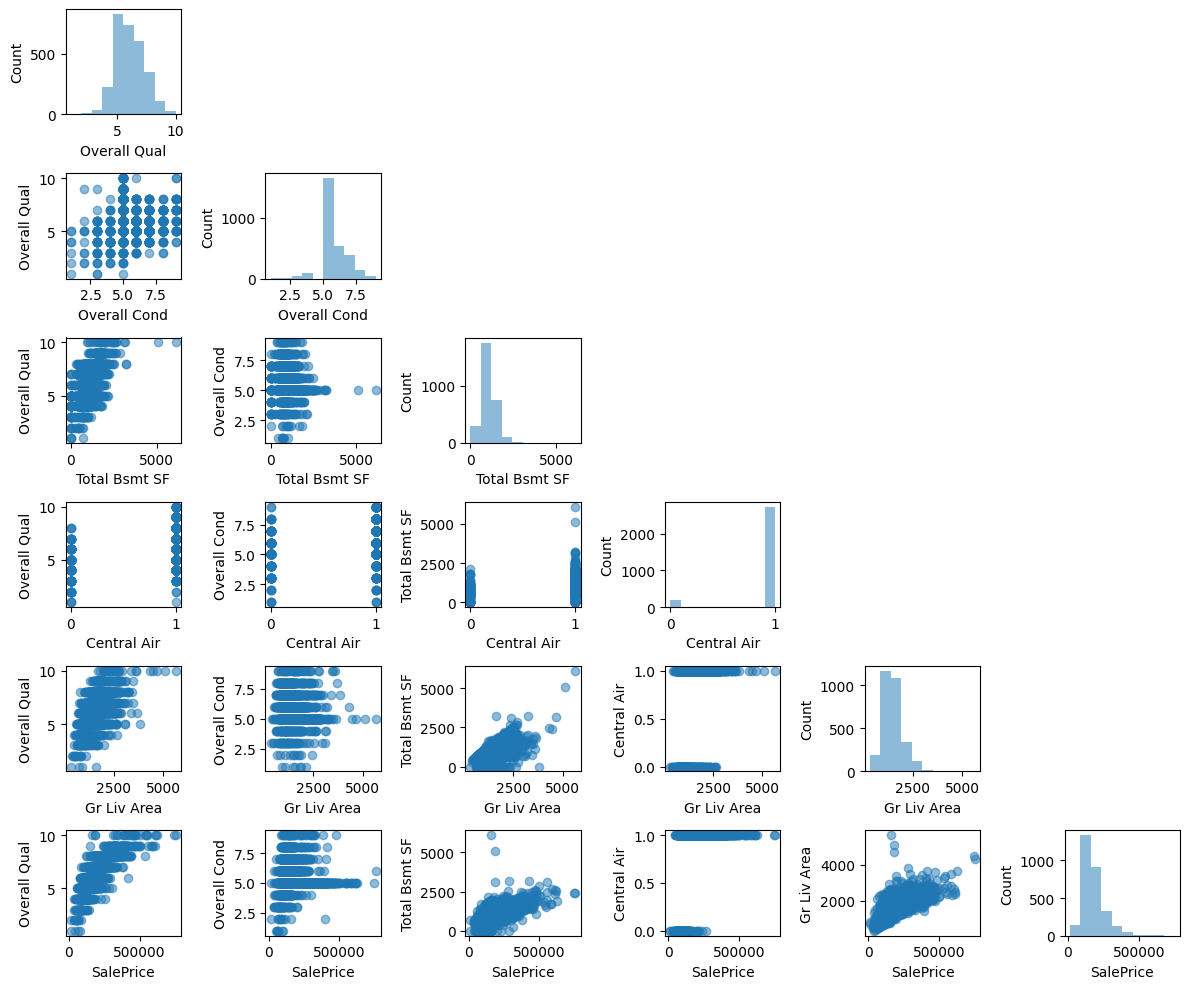

In [22]:
# Membuat scatterplot matrix untuk melihat hubungan antar fitur
scatterplotmatrix(df.values, figsize=(12, 10),               # Silakan diisi bagian ini dengan kode yang tepat
                  names=df.columns,             # Membuat scatterplot matrix untuk melihat hubungan antar fitur
                  alpha=0.5)                    # transparansi titik

plt.tight_layout()
plt.show()                                     # Silakan diisi bagian ini dengan kode yang tepat

Gambar ini merupakan **scatterplot matrix** yang menampilkan hubungan pasangan antar fitur utama pada dataset Ames Housing. Setiap sel menunjukkan pola sebaran antara dua variabel, sehingga kita dapat melihat kecenderungan linear, keberadaan outlier, serta kekuatan hubungan antar fitur. Misalnya, fitur **Gr Liv Area** dan **SalePrice** terlihat memiliki pola linear positif yang kuat, menunjukkan bahwa semakin besar luas area rumah di atas tanah, semakin tinggi harga jualnya. Sebaliknya, beberapa fitur seperti **Central Air** tampak memiliki hubungan yang lebih terbatas atau bersifat kategorikal. Secara keseluruhan, visualisasi ini membantu memahami interaksi antar variabel sebelum membangun model regresi.


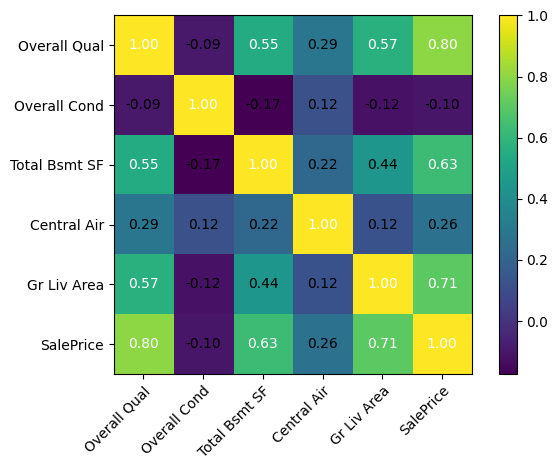

In [23]:
import numpy as np
from mlxtend.plotting import heatmap

# Menghitung korelasi antar fitur
cm = np.corrcoef(df.values.T)

# Menampilkan heatmap korelasi
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)

plt.tight_layout()                                                      # Silakan diisi bagian ini dengan kode yang tepat

plt.show()                                                      # Silakan diisi bagian ini dengan kode yang tepat

Gambar ini menunjukkan **heatmap korelasi** antar fitur pada dataset Ames Housing, di mana warna mewakili kekuatan dan arah hubungan antara dua variabel. Nilai korelasi yang lebih terang (mendekati kuning) menunjukkan hubungan positif yang kuat, sedangkan warna gelap (ungu) menunjukkan korelasi rendah atau negatif. Terlihat bahwa **SalePrice** memiliki korelasi tinggi dengan *Overall Qual* (0.80), *Gr Liv Area* (0.71), dan *Total Bsmt SF* (0.63), yang berarti fitur-fitur ini sangat berpengaruh terhadap harga rumah. Sebaliknya, *Overall Cond* hampir tidak memiliki hubungan signifikan dengan harga jual. Heatmap ini membantu mengidentifikasi fitur mana yang paling relevan untuk analisis regresi dan mendeteksi potensi multikolinearitas.


# 📈 Regresi Linear dengan Gradient Descent

Pada bagian ini dilakukan implementasi regresi linear sederhana menggunakan algoritma **Gradient Descent**. Langkah-langkah yang dilakukan adalah:

1. **Mendefinisikan class LinearRegressionGD**, yaitu model regresi linear yang mengupdate bobot menggunakan rumus gradient descent.
2. **Menyiapkan data** (mengambil fitur `Gr Liv Area` dan target `SalePrice`) dan melakukan standardisasi sebelumnya.
3. **Melatih model** menggunakan data yang sudah distandarkan, kemudian memantau proses training melalui grafik **MSE vs Epoch**.
4. **Memvisualisasikan garis regresi** pada scatterplot untuk melihat kecocokan model terhadap data.
5. **Melakukan prediksi harga rumah** dengan luas 2500 sqft, termasuk mengembalikan hasil dari skala standar ke skala asli.
6. **Menampilkan parameter model** berupa slope (koefisien regresi) dan intercept (bias).

Bagian ini memberikan gambaran lengkap tentang bagaimana regresi linear bekerja mulai dari dasar hingga prediksi praktis menggunakan Gradient Descent.


In [24]:
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta                   # learning rate: seberapa besar langkah update bobot
        self.n_iter = n_iter             # selisih prediksi dengan target
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])     # inisialisasi bobot kecil acak
        self.b_ = np.array([0.])                                        # inisialisasi bias
        self.losses_ = []                                               # menyimpan nilai loss tiap iterasi

        for i in range(self.n_iter):
            output = self.net_input(X)                                    # prediksi berdasarkan bobot dan input
            errors = (y - output)                                         # selisih prediksi dengan target
            # update bobot dan bias menggunakan rumus gradient descent
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()                 # MSE: rata-rata error kuadrat
            self.losses_.append(loss)                 # simpan loss per iterasi
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_           # persamaan linear: w·x + b

    def predict(self, X):
        return self.net_input(X)                      # hasil prediksi akhir

In [25]:
# Mengambil satu fitur
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

In [26]:
# melatih model pada data yang distandarisasikan
lr = LinearRegressionGD(eta=0.1)                              # Silakan diisi bagian ini dengan kode yang tepat
lr.fit(X_std, y_std)                             # Silakan diisi bagian ini dengan kode yang tepat

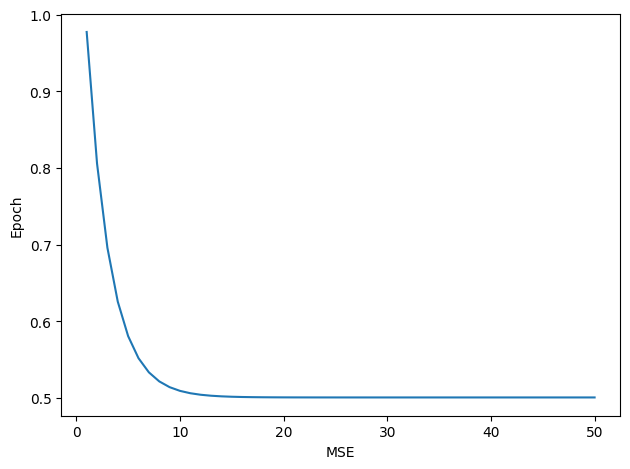

In [27]:
# plot MSE vs epoch
plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.ylabel('Epoch')                          # Silakan diisi bagian ini dengan kode yang tepat
plt.xlabel('MSE')                          # Silakan diisi bagian ini dengan kode yang tepat

plt.tight_layout()                                  # Silakan diisi bagian ini dengan kode yang tepat

plt.show()                                  # Silakan diisi bagian ini dengan kode yang tepat

In [28]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70) # sebaran data
    plt.plot(X, model.predict(X), color='black', lw=2)        # garis regresi
    return 

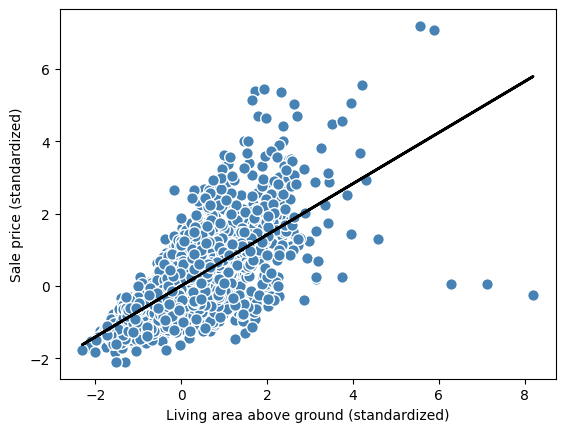

In [29]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Living area above ground (standardized)')                                      # Silakan diisi bagian ini dengan kode yang tepat
plt.ylabel('Sale price (standardized)')


plt.show()                                              # Silakan diisi bagian ini dengan kode yang tepat

In [30]:
feature_std = sc_x.transform(np.array([[2500]]))                    # standarisasi input baru

target_std = lr.predict(feature_std)                                # prediksi dalam skala standar

target_reverted = sc_y.inverse_transform(target_std.reshape(-1, 1)) # ubah ke harga asli

print(f'Sale price: ${target_reverted.flatten()[0]:.2f}')
print(f'Sale price: ${target_reverted.flatten()[0]:.2f}')

Sale price: $292507.07
Sale price: $292507.07


In [31]:
print(f'Slope: {lr.w_[0]:.3f}')     # koefisien regresi
print(f'Intercept: {lr.b_[0]:.3f}') # bias regresi

Slope: 0.707
Intercept: -0.000


<br>
<br>

# 📈 Regresi Linear Menggunakan Scikit-Learn & Normal Equation

Pada bagian ini dilakukan dua pendekatan untuk menghitung model regresi linear:

### 1️⃣ Regresi Linear dengan Scikit-Learn
- Model dibuat dengan `LinearRegression()`.
- Data `X` dan `y` digunakan untuk melatih model.
- Slope dan intercept diambil langsung dari atribut model.
- Garis regresi divisualisasikan untuk melihat kecocokan model dengan data.

### 2️⃣ Regresi Linear dengan Normal Equation
- Pendekatan manual menggunakan rumus matematis:
  \[(X^TX)^{-1}X^Ty\]
- Kolom 1 ditambahkan ke dalam X untuk menghitung intercept.
- Hasil slope dan intercept dibandingkan dengan output sklearn.

Kedua metode memberikan hasil yang sama karena keduanya menyelesaikan persamaan regresi linear yang identik.


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
# Membuat objek model regresi linear dari scikit-learn.
slr = LinearRegression()

# Melatih model menggunakan data ____ (Gr Liv Area) dan ____ (SalePrice).
slr.fit(X, y)                                                 # Silakan diisi bagian ini dengan kode yang tepat

# Menghasilkan prediksi harga berdasarkan model yang sudah dilatih
y_pred = slr.predict(X)

# Menampilkan koefisien regresi (slope) dan bias (intercept) dari model sklearn
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Intercept: {slr.intercept_:.3f}')


Slope: 111.666
Intercept: 13342.979


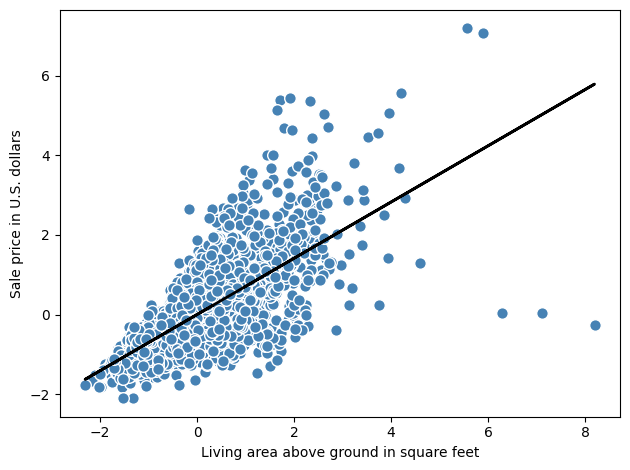

In [34]:
# Menampilkan scatterplot dan garis regresi dari model
lin_regplot(X_std, y_std, lr)                           # Silakan diisi bagian ini dengan kode yang tepat
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')

plt.tight_layout()

plt.show()                                             # Silakan diisi bagian ini dengan kode yang tepat                 

In [36]:
# Menambahkan kolom 1 di depan X untuk memasukkan intercept ke dalam perhitungan
Xb = np.hstack((np.ones((X.shape[0], 1)), X))

w = np.zeros(X.shape[1])

# Menghitung bagian pertama dari rumus normal equation
z = np.linalg.inv(np.dot(Xb.T, Xb))           # menghitung invers dari XᵀX

# Menyelesaikan perhitungan bobot regresi
w = np.dot(z, np.dot(Xb.T, y))                # menerapkan rumus: w = (XᵀX)⁻¹ Xᵀ y

# Menampilkan slope & intercept hasil perhitungan manual
print(f'Slope: {w[1]:.3f}')
print(f'Intercept: {w[0]:.3f}')

Slope: 111.666
Intercept: 13342.979


<br>
<br>

# 🛡️ Regresi Robust dengan RANSAC

Pada bagian ini digunakan metode **RANSAC (RANdom SAmple Consensus)** untuk melakukan regresi yang tahan terhadap data pencilan (*outliers*). Berbeda dengan regresi linear biasa, RANSAC bekerja dengan cara:

1. Mengambil sampel acak kecil dari data untuk membentuk model sementara.
2. Menguji model tersebut terhadap seluruh data.
3. Menentukan titik mana yang cocok dengan model (**inliers**) dan mana yang menyimpang (**outliers**).
4. Memilih model dengan jumlah inliers terbanyak.

Visualisasi menunjukkan pemisahan jelas antara inliers (biru) dan outliers (hijau). Selain itu, percobaan dilakukan dua kali pertama dengan ambang default, lalu dengan `residual_threshold` yang ditentukan untuk melihat bagaimana model berubah saat sensitivitas terhadap outlier diatur.

Metode ini sangat berguna ketika data memiliki banyak nilai ekstrem yang dapat mengganggu akurasi regresi biasa.


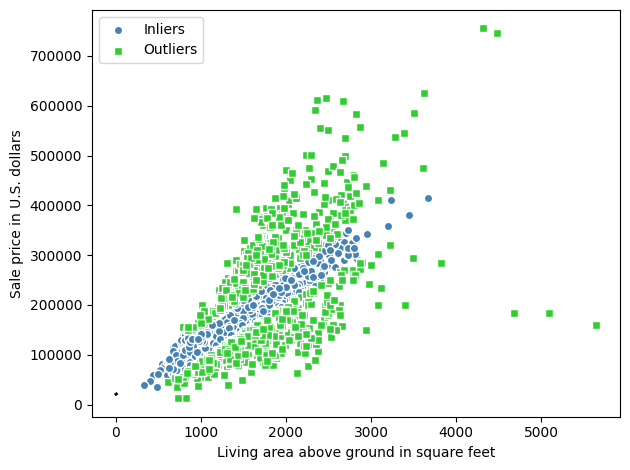

In [37]:
from sklearn.linear_model import RANSACRegressor

# Buat model RANSAC dengan regresi linear sebagai estimator dasar
ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100,         # jumlah percobaan pemilihan sampel acak
                         min_samples=0.95,       # proporsi minimal data untuk membentuk model
                         loss='absolute_error',  # fungsi loss yang tahan outlier
                         residual_threshold=None, # default 
                         random_state=None)       # Silakan diisi bagian ini dengan kode yang tepat

# Latih model RANSAC menggunakan data ____ dan ____
ransac.fit(X, y)      # Silakan diisi bagian ini dengan kode yang tepat

# Mask untuk menandai data yang dianggap inlier oleh RANSAC
inlier_mask = ransac.inlier_mask_

# Mask kebalikan untuk menandai data outlier
outlier_mask = np.logical_not(inlier_mask)

# Buat rentang nilai X untuk menggambar garis regresi RANSAC
line_X = np.arange(3, 10, 1)

# Prediksi nilai Y untuk garis regresi
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

# Scatter plot data inlier
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')

# Scatter plot data outlier
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')

# Gambar garis regresi RANSAC
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Living area above ground in square feet')                                  # Silakan diisi bagian ini dengan kode yang tepat
plt.ylabel('Sale price in U.S. dollars')                                  # Silakan diisi bagian ini dengan kode yang tepat
plt.legend(loc='upper left')

plt.tight_layout()                                         # Silakan diisi bagian ini dengan kode yang tepat

plt.show()                                         # Silakan diisi bagian ini dengan kode yang tepat

In [38]:
# Tampilkan slope dan intercept model RANSAC
print(f'Slope: {ransac.estimator_.coef_[0]:.3f}')
print(f'Intercept: {ransac.estimator_.intercept_:.3f}')

Slope: 106.110
Intercept: 20440.812


In [39]:
# Fungsi menghitung Median Absolute Deviation (MAD)
def median_absolute_deviation(data):
    return np.median(np.abs(data - np.median(data)))
    
median_absolute_deviation(y)

37000.0

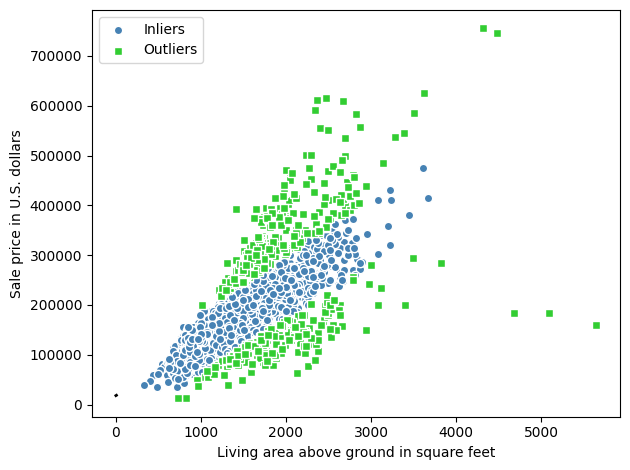

In [40]:
# Buat ulang model RANSAC dengan threshold residual yang lebih spesifik
ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100,          # Silakan diisi bagian ini dengan kode yang tepat100
                         min_samples=0.95, 
                         loss='absolute_error', 
                         residual_threshold=65000, # batas error untuk klasifikasi outlier 
                         random_state=None)        # Silakan diisi bagian ini dengan kode yang tepat

# Latih ulang model RANSAC dengan threshold baru
ransac.fit(X, y)

# Mask inlier & outlier untuk model baru
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)

# Buat garis regresi baru
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

# Plot inlier, outlier, dan garis regresi
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')              # titik yang cocok dengan model

plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')             # titik yang dianggap menyimpang
plt.plot(line_X, line_y_ransac, color='black', lw=2)  # garis regresi hasil RANSAC 

plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [41]:
# Tampilkan slope & intercept model RANSAC terbaru
print(f'Slope: {ransac.estimator_.coef_[0]:.3f}')         # Silakan diisi bagian ini dengan kode yang tepat
print(f'Intercept: {ransac.estimator_.intercept_:.3f}')   # Silakan diisi bagian ini dengan kode yang tepat


Slope: 106.087
Intercept: 17748.082


<br>
<br>

# 📊 Evaluasi Regresi Linear dengan Train–Test Split

Pada bagian ini dilakukan proses evaluasi model regresi linear menggunakan pembagian data **train (70%)** dan **test (30%)**. Setelah model dilatih dengan data training, prediksi dibuat untuk kedua set dan residualnya divisualisasikan untuk melihat sebaran error.

Tiga metrik evaluasi digunakan:
- **MSE (Mean Squared Error)** untuk mengukur kesalahan kuadrat rata-rata,
- **MAE (Mean Absolute Error)** untuk melihat rata-rata selisih prediksi,
- **R² Score** untuk mengukur seberapa baik model menjelaskan data.

Visualisasi residual dan hasil evaluasi membantu menentukan apakah model overfitting, underfitting, atau sudah sesuai.


In [42]:
from sklearn.model_selection import train_test_split

# Tentukan kolom target (harga rumah)
target = 'SalePrice'                             # Silakan diisi bagian ini dengan kode yang tepat

# Ambil semua kolom fitur kecuali target
features = df.columns[df.columns != target]


# Pisahkan fitur (X) dan target (y)
X = df[features].values
y = df[target].values

# Bagi data menjadi data latih (70%) dan data uji (30%)
X_train, X_test, y_train, y_test = train_test_split(              # Silakan diisi bagian ini dengan kode yang tepat
    X, y, test_size=0.3, random_state=1)            # Silakan diisi bagian ini dengan kode yang tepat

In [43]:
# Buat model regresi linear
slr = LinearRegression()

# Latih model menggunakan data latih
slr.fit(X_train, y_train)

# Prediksi harga untuk data latih
y_train_pred = slr.predict(X_train)

# Prediksi harga untuk data uji
y_test_pred = slr.predict(X_test)

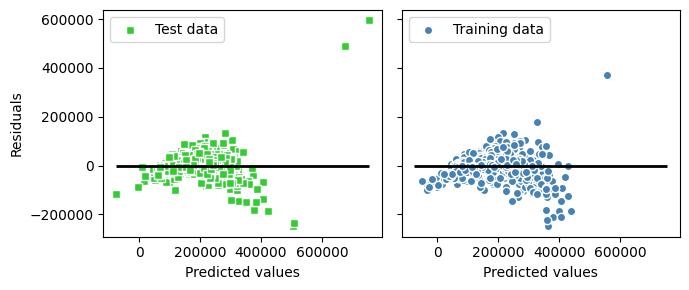

In [44]:
# Cari nilai prediksi maksimum dan minimum (untuk mengatur skala grafik)
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

# Buat 2 plot: residual data uji dan residual data latih
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

# Plot residual untuk data uji
ax1.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')

# Plot residual untuk data latih
ax2.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')

ax1.set_ylabel('Residuals')



# Tambahkan garis horizontal y = 0 (batas error)
for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='black', lw=2)

plt.tight_layout()

plt.show()

In [45]:
from sklearn.metrics import mean_squared_error

# Hitung MSE untuk train dan test
mse_train = mean_squared_error(y_train, y_train_pred)  # Silakan diisi bagian ini dengan kode yang tepat
mse_test = mean_squared_error(y_test, y_test_pred)         # Silakan diisi bagian ini dengan kode yang tepat
print(f'MSE train: {mse_train:.2f}')
print(f'MSE test: {mse_test:.2f}')

MSE train: 1313405820.65
MSE test: 1986594849.95


In [46]:
from sklearn.metrics import mean_absolute_error

# Hitung MAE untuk train dan test
mae_train = mean_absolute_error(y_train, y_train_pred)      # Silakan diisi bagian ini dengan kode yang tepat
mae_test = mean_absolute_error(y_test, y_test_pred)   # Silakan diisi bagian ini dengan kode yang tepat
print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')

MAE train: 25362.21
MAE test: 26416.25


In [47]:
from sklearn.metrics import r2_score

# Hitung R² untuk train dan test
r2_train = r2_score(y_train, y_train_pred)         # Silakan diisi bagian ini dengan kode yang tepat
r2_test = r2_score(y_test, y_test_pred)           # Silakan diisi bagian ini dengan kode yang tepat
print(f'R^2 train: {r2_train:.2f}')
print(f'R^2 test: {r2_test:.2f}')

R^2 train: 0.79
R^2 test: 0.71


<br>
<br>

# 🔧 Regularisasi pada Regresi Linear: Lasso, Ridge, dan ElasticNet

Bagian ini menunjukkan bagaimana tiga teknik regularisasi digunakan untuk mengurangi overfitting pada regresi linear:

### 1️⃣ **Lasso Regression (L1)**
- Memberikan penalti L1 pada bobot.
- Dapat "menghapus" fitur dengan membuat koefisien menjadi **0**.
- Cocok untuk mencari fitur penting (feature selection).

### 2️⃣ **Ridge Regression (L2)**
- Memberikan penalti L2 (mengkuadratkan bobot).
- Mengecilkan bobot tetapi **tidak membuatnya menjadi 0**.
- Baik untuk data dengan multikolinearitas.

### 3️⃣ **ElasticNet (L1 + L2)**
- Kombinasi Lasso dan Ridge.
- Stabil seperti Ridge, tetapi juga bisa melakukan feature selection seperti Lasso.

Evaluasi dilakukan dengan:
- **MSE (Mean Squared Error)** → mengukur tingkat error.
- **R² Score** → mengukur kualitas prediksi.

Tujuannya adalah melihat bagaimana regularisasi mempengaruhi performa model saat menggunakan banyak fitur pada dataset Ames Housing.


In [48]:
from sklearn.linear_model import Lasso

# Buat model Lasso Regression (regularisasi L1)
lasso = Lasso(alpha=1.0)                         # Silakan diisi bagian ini dengan kode yang tepat

# Latih model menggunakan data training
lasso.fit(X_train, y_train)                        # Silakan diisi bagian ini dengan kode yang tepat

# Prediksi pada data training dan testing
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Tampilkan koefisien (Lasso akan mengecilkan beberapa coefficient menjadi 0)
print(lasso.coef_)

[25427.76131126  2091.16048389    48.71107989  7268.21309939
    55.24346684]


In [49]:
# Hitung MSE untuk menilai error model
train_mse = mean_squared_error(y_train, y_train_pred)               # Silakan diisi bagian ini dengan kode yang tepat
test_mse = mean_squared_error(y_test, y_test_pred)                 # Silakan diisi bagian ini dengan kode yang tepat
print(f'MSE train: {train_mse:.3f}, test: {test_mse:.3f}')

# Hitung R² untuk melihat kualitas prediksi
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'R^2 train: {train_r2:.3f}, {test_r2:.3f}')

MSE train: 1313405837.297, test: 1986629584.251
R^2 train: 0.788, 0.709


In [50]:
from sklearn.linear_model import Ridge

# Buat model Ridge Regression (regularisasi L2)
ridge = Ridge(alpha=1.0)                         # Silakan diisi bagian ini dengan kode yang tepat

LASSO regression:

In [51]:
from sklearn.linear_model import Lasso

# Buat ulang model Lasso
lasso = Lasso(alpha=1.0)                 # Silakan diisi bagian ini dengan kode yang tepat

In [52]:
from sklearn.linear_model import ElasticNet

# Model ElasticNet (kombinasi L1 dan L2)
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)      # Silakan diisi bagian ini dengan kode yang tepat

<br>
<br>

# 📈 Regresi Linear vs Polynomial Regression

Pada bagian ini dibandingkan dua jenis model regresi:
- **Linear Regression (garis lurus)**
- **Polynomial Regression derajat 2 (kurva)**

Langkah-langkahnya:

1. Membuat dataset kecil berisi 10 titik data.
2. Melatih model regresi linear pada fitur asli.
3. Mengubah fitur menjadi polinomial derajat 2 dan melatih model kedua.
4. Memvisualisasikan dua garis regresi (linear vs quadratic).
5. Mengukur performa model dengan **MSE** dan **R² Score**.

Hasilnya menunjukkan bahwa model polinomial biasanya menangkap pola data lebih baik daripada model linear ketika hubungan data bersifat melengkung.


In [53]:
# Membuat array X (fitur) dalam bentuk kolom (10 sampel)
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

# Membuat array y (target) sesuai urutan nilai X
y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

In [54]:
from sklearn.preprocessing import PolynomialFeatures

# Model regresi linear biasa
lr = LinearRegression()

# Model regresi untuk fitur polinomial
pr = LinearRegression()

# Buat fitur polinomial derajat 2
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

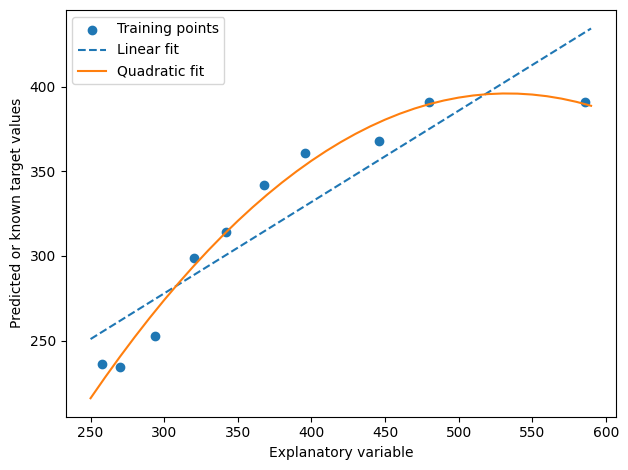

In [55]:
# Latih model linear pada fitur asli
lr.fit(X, y)

# Rentang nilai X untuk menggambar hasil prediksi
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# Latih model polinomial pada X_quad
pr.fit(X_quad, y)

# Prediksi nilai polinomial pada X_fit
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# Plot titik data asli
plt.scatter(X, y, label='Training points')

# Plot garis regresi linear
plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')

# Plot garis regresi quadratic
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')

plt.tight_layout()                                      # Silakan diisi bagian ini dengan kode yang tepat
plt.show()                                     # Silakan diisi bagian ini dengan kode yang tepat

In [57]:
# Prediksi ulang pada data training untuk menghitung error
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

In [58]:
# Hitung MSE linear vs quadratic
mse_lin = mean_squared_error(y, y_lin_pred)
mse_quad = mean_squared_error(y, y_quad_pred)
print(f'Training MSE linear: {mse_lin:.3f}'
      f', quadratic: {mse_quad:.3f}')

# Hitung R² linear vs quadratic
r2_lin = r2_score(y, y_lin_pred)                 # Silakan diisi bagian ini dengan kode yang tepat
r2_quad = r2_score(y, y_quad_pred)                # Silakan diisi bagian ini dengan kode yang tepat
print(f'Training R^2 linear: {r2_lin:.3f}'
      f', quadratic: {r2_quad:.3f}')

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


<br>
<br>

# 📈 Perbandingan Linear, Quadratic, dan Cubic Regression

Pada bagian ini dilakukan percobaan regresi menggunakan tiga jenis model:

### 1️⃣ Linear Regression (derajat 1)  
Model garis lurus yang menangkap hubungan sederhana antar variabel.

### 2️⃣ Polynomial Regression derajat 2 (Quadratic)  
Model kurva parabola, mampu mengikuti pola data yang melengkung.

### 3️⃣ Polynomial Regression derajat 3 (Cubic)  
Model kurva yang lebih fleksibel dan dapat mengikuti pola data yang lebih kompleks.

Dua fitur diuji:
- **Gr Liv Area** (luas bangunan di atas tanah)  
- **Overall Qual** (kualitas rumah)

Langkah analisis:
1. Membuat fitur polinomial (d=2 dan d=3).  
2. Melatih model linear, quadratic, dan cubic.  
3. Menggambar kurva regresi untuk masing-masing model.  
4. Menghitung **R²** untuk melihat seberapa baik model menjelaskan variasi harga.

Visualisasi ini menunjukkan bagaimana model dengan derajat lebih tinggi dapat menangkap pola data yang tidak linear.


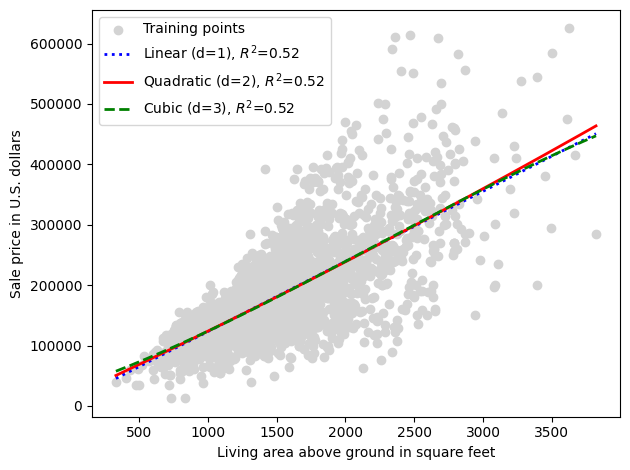

In [59]:
# Ambil fitur 'Gr Liv Area' dan target 'SalePrice'
X = df[['Gr Liv Area']].values                             # Silakan diisi bagian ini dengan kode yang tepat
y = df['SalePrice'].values                               # Silakan diisi bagian ini dengan kode yang tepat

# Buang rumah berukuran > 4000 sqft agar tidak ada outlier ekstrem
X = X[(df['Gr Liv Area'] < 4000)]
y = y[(df['Gr Liv Area'] < 4000)]

# Buat model regresi linear
regr = LinearRegression()

# Buat fitur polinomial derajat 2 dan 3
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)           # Silakan diisi bagian ini dengan kode yang tepat
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# Buat rentang X untuk menggambar kurva model
X_fit = np.arange(X.min()-1, X.max()+2, 1)[:, np.newaxis]

# Latih model dengan fitur linear (d=1)
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

# Latih model dengan fitur quadratic (d=2)
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))                 # Silakan diisi bagian ini dengan kode yang tepat

# Latih model dengan fitur cubic (d=3)
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))                    # Silakan diisi bagian ini dengan kode yang tepat


# Plot data dan ketiga model (linear, quadratic, cubic)
plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit,                                 # Silakan diisi bagian ini dengan kode yang tepat
         label=f'Linear (d=1), $R^2$={linear_r2:.2f}',
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit,                                # Silakan diisi bagian ini dengan kode yang tepat
         label=f'Quadratic (d=2), $R^2$={quadratic_r2:.2f}',
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit,                               # Silakan diisi bagian ini dengan kode yang tepat
         label=f'Cubic (d=3), $R^2$={cubic_r2:.2f}',
         color='green', 
         lw=2,
         linestyle='--')


plt.xlabel('Living area above ground in square feet')        # Silakan diisi bagian ini dengan kode yang tepat
plt.ylabel('Sale price in U.S. dollars')                     # Silakan diisi bagian ini dengan kode yang tepat
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

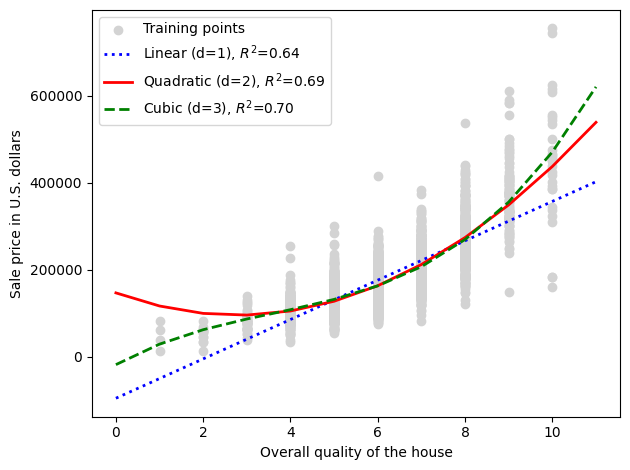

In [60]:
# Ulangi proses yang sama tetapi dengan fitur 'Overall Qual'
X = df[['Overall Qual']].values                            # Silakan diisi bagian ini dengan kode yang tepat
y = df['SalePrice'].values                                  # Silakan diisi bagian ini dengan kode yang tepat

# Model regresi linear
regr = LinearRegression()

# Fitur polinomial derajat 2 dan 3
quadratic = PolynomialFeatures(degree=2)                   # Silakan diisi bagian ini dengan kode yang tepat
cubic = PolynomialFeatures(degree=3)                       # Silakan diisi bagian ini dengan kode yang tepat
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# Rentang X untuk plot
X_fit = np.arange(X.min()-1, X.max()+2, 1)[:, np.newaxis]

# Latih model pada fitur linear
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

# Latih model quadratic
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

# Latih model cubic
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results
plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label=f'Linear (d=1), $R^2$={linear_r2:.2f}',
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label=f'Quadratic (d=2), $R^2$={quadratic_r2:.2f}',
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label=f'Cubic (d=3), $R^2$={cubic_r2:.2f}',
         color='green', 
         lw=2,
         linestyle='--')


plt.xlabel('Overall quality of the house')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')

plt.tight_layout()

plt.show()

<br>
<br>

# 🌳 Decision Tree Regression untuk Prediksi Harga Rumah

Pada bagian ini digunakan **Decision Tree Regressor**, yaitu model non-linear yang membagi data ke dalam beberapa aturan (rules) berdasarkan nilai fitur.

### Langkah-langkah:
1. Mengambil fitur **Gr Liv Area** sebagai input dan **SalePrice** sebagai target.
2. Membuat model **DecisionTreeRegressor** dengan `max_depth=3` untuk mencegah overfitting.
3. Melatih model dan memplot hasil prediksi dibandingkan data asli.
4. Menghitung **R² Score** untuk menilai seberapa baik model memprediksi harga rumah.

Model pohon keputusan dapat menangkap hubungan non-linear pada data, sehingga bentuk prediksi akan berupa garis bertingkat (step function), bukan garis lurus.


...

## Decision tree regression

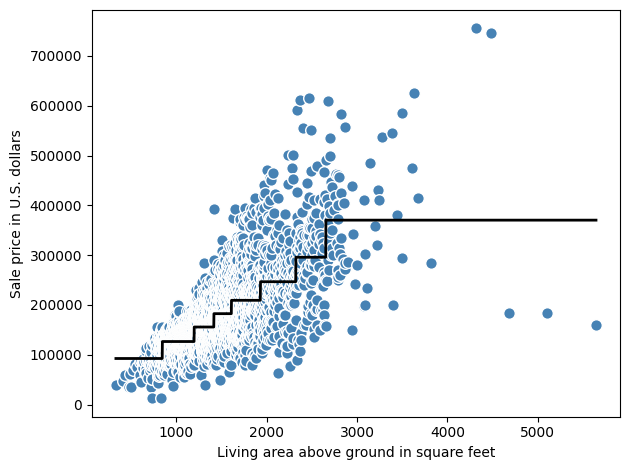

In [61]:
from sklearn.tree import DecisionTreeRegressor

# Ambil fitur 'Gr Liv Area' dan target 'SalePrice'
X = df[['Gr Liv Area']].values                             # Silakan diisi bagian ini dengan kode yang tepat
y = df['SalePrice'].values                               # Silakan diisi bagian ini dengan kode yang tepat

# Buat model Decision Tree dengan kedalaman maksimum 3
tree = DecisionTreeRegressor(max_depth=3)                              # Silakan diisi bagian ini dengan kode yang tepat

# Latih model pohon keputusan
tree.fit(X, y)

# Urutkan X agar garis prediksi dapat digambar dengan rapi
sort_idx = X.flatten().argsort()

# Plot data dan prediksi dari Decision Tree
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')

plt.tight_layout()

plt.show()

In [62]:
# Hitung skor R² untuk menilai performa model
tree_r2 = r2_score(y, tree.predict(X))              # Silakan diisi bagian ini dengan kode yang tepat


<br>
<br>

# 🌲 Random Forest Regression — Prediksi Harga Rumah

Pada bagian ini digunakan **Random Forest Regressor**, yaitu model ensemble yang terdiri dari banyak pohon keputusan untuk meningkatkan akurasi dan stabilitas model.

### Alur yang dilakukan:
1. Memisahkan data menjadi **training (70%)** dan **testing (30%)**.
2. Melatih model Random Forest dengan **1000 pohon**.
3. Melakukan prediksi pada data training dan testing.
4. Mengukur performa model menggunakan:
   - **MAE** (Mean Absolute Error)
   - **R² Score**
5. Membuat dua grafik residual untuk membandingkan error pada data training dan testing.

Model Random Forest biasanya memberikan performa yang kuat dalam regresi karena mampu menangkap hubungan non-linear tanpa perlu transformasi fitur yang rumit.


In [64]:
# Tentukan kolom target (____) dan fitur lain
target = 'SalePrice'                                     # Silakan diisi bagian ini dengan kode yang tepat
features = df.columns[df.columns != target]

# Ambil seluruh fitur (X) dan target (y)
X = df[features].values
y = df[target].values                                 # Silakan diisi bagian ini dengan kode yang tepat

# Bagi data menjadi training (70%) dan testing (30%)
X_train, X_test, y_train, y_test = train_test_split(          # Silakan diisi bagian ini dengan kode yang tepat
    X, y, test_size=0.3, random_state=1)        # Silakan diisi bagian ini dengan kode yang tepat

In [68]:
from sklearn.ensemble import RandomForestRegressor

# Buat model Random Forest dengan 1000 pohon
forest = RandomForestRegressor(n_estimators=1000,           # Silakan diisi bagian ini dengan kode yang tepat
                               criterion='squared_error',   # fungsi loss untuk regresi
                               random_state=42,           # untuk hasil konsisten
                               n_jobs=-1)                   # gunakan semua core CPU

# Latih model pada data training
forest.fit(X_train, y_train)

# Prediksi nilai pada train dan test
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# Hitung MAE untuk melihat rata-rata selisih absolut error
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE train: {mae_train:.2f}')                     # Silakan diisi bagian ini dengan kode yang tepat
print(f'MAE test: {mae_test:.2f}')                      # Silakan diisi bagian ini dengan kode yang tepat

# Hitung R² untuk menilai kemampuan model menjelaskan variasi data
r2_train = r2_score(y_train, y_train_pred)              # Silakan diisi bagian ini dengan kode yang tepat
r2_test =r2_score(y_test, y_test_pred)                  # Silakan diisi bagian ini dengan kode yang tepat
print(f'R^2 train: {r2_train:.2f}')
print(f'R^2 test: {r2_test:.2f}')

MAE train: 8128.47
MAE test: 21695.19
R^2 train: 0.98
R^2 test: 0.83


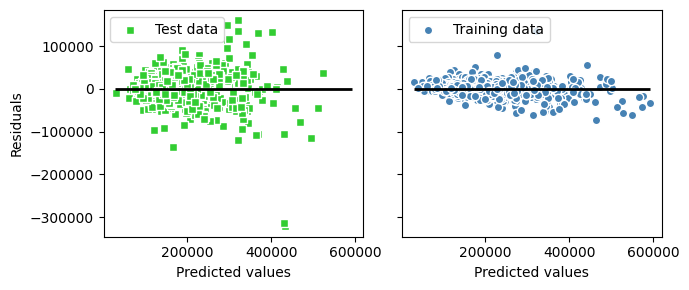

In [69]:
# Cari nilai prediksi maksimum dan minimum untuk skala plot
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

# Buat 2 plot residual: test dan train
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

# Plot residual untuk data test
ax1.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')

# Plot residual untuk data train
ax2.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
ax1.set_ylabel('Residuals')

# Tambahkan garis horizontal y=0 untuk referensi error
for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='black', lw=2)

plt.tight_layout()

plt.show()         # Silakan diisi bagian ini dengan kode yang tepat

In [70]:
import pickle                         # Silakan diisi bagian ini dengan kode yang tepat

model_package = {
    "model": forest,               # model random forest
    "mae_train": mae_train,        
    "mae_test": mae_test,          
    "r2_train": r2_train,          
    "r2_test": r2_test             
}

with open("RFREG_model.pkl", "wb") as f:    # Silakan diisi bagian ini dengan kode yang tepat
    pickle.dump(model_package, f)             # Silakan diisi bagian ini dengan kode yang tepat
